In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = (784 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 = (100X10)  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        # cross entropy 
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        # cross entropy
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
   
    
    # 정확도 측정함수 
    def accuracy(self, test_input_data, test_target_data):
        
        matched_list = []
        not_matched_list = []
        
        
        for index in range(len(test_input_data)):
                        
            label = int(test_target_data[index])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_input_data[index] / 255.0 * 0.99) + 0.01
                  
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            predicted_num = self.predict(np.array(data, ndmin=2)) 
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                
                not_matched_list.append(index)
        
        accuracy_val = (len(matched_list)/(len(test_input_data)))
        
        return accuracy_val, not_matched_list
    
    
    def train(self, input_data, target_data):   # input_data : 784 개, target_data : 10개
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3  
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
    
        return predicted_num

In [3]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, file_path, seperation_rate, target_position=-1):
        
        self.file_path = file_path
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [4]:
test_seperation_rate = 0.4 # 테스트 데이터 분리비율

try:

    data_obj = DataGeneration('../mnist_train.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('================================================')
    
except Exception as err:
    print('Exception occur !!')

[DataGeneration]  loaded_data.shape =  (60000, 785)
[DataGeneration] unique number of original data =  0.0 , count =  60000
[DataGeneration] unique number of original data =  0.0 , ratio =  100.0  %
[DataGeneration] unique number of training data =  0.0 , count =  36000
[DataGeneration] unique number of training data =  0.0 , ratio =  100.0  %
[DataGeneration] unique number of test data =  0.0 , count =  24000
[DataGeneration] unique number of test data =  0.0 , ratio =  100.0  %
training data.shape =  (36000, 785)
test data.shape =  (24000, 785)


In [5]:
# hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 100     # hidden 1 nodes
o_nodes = 10       # output nodes
lr = 0.1           # learning rate
epochs = 20         # epochs

# 손실함수 값을 저장할 list 생성
loss_val_list = []
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


nn = NeuralNetwork(i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    
    for step in range(len(training_data)):  # train
    
        # input_data, target_data normalize        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )  # train 할 경우에 행렬로 입력
        
        if step % 1000 == 0:
            print("epochs = ", i, ", step = ", step,  ", current loss_val = ", nn.loss_val())
        
        cur_loss_val = nn.loss_val()
    
        loss_val_list.append(cur_loss_val)
    
    training_accuracy = nn.accuracy(training_data[:, 1:], training_data[:, 0])[0]
    
    validation_accuracy = nn.accuracy(test_data[:, 1:], test_data[:, 0])[0]
    
    accuracy_val_list.append(training_accuracy)
    
    validation_accuracy_val_list.append(validation_accuracy)

end_time = datetime.now() 

print("\nelapsed time = ", end_time - start_time) 

epochs =  0 , step =  0 , current loss_val =  7.726685105739293
epochs =  0 , step =  1000 , current loss_val =  2.4146371274136853
epochs =  0 , step =  2000 , current loss_val =  1.6747981168837784
epochs =  0 , step =  3000 , current loss_val =  0.7781547232314878
epochs =  0 , step =  4000 , current loss_val =  1.043392265260004
epochs =  0 , step =  5000 , current loss_val =  0.7918201334576362
epochs =  0 , step =  6000 , current loss_val =  0.9039843288195127
epochs =  0 , step =  7000 , current loss_val =  0.7047256512942853
epochs =  0 , step =  8000 , current loss_val =  1.231569009493784
epochs =  0 , step =  9000 , current loss_val =  0.9102126017888018
epochs =  0 , step =  10000 , current loss_val =  1.236673043809909
epochs =  0 , step =  11000 , current loss_val =  0.6623947892895701
epochs =  0 , step =  12000 , current loss_val =  0.7494383754944386
epochs =  0 , step =  13000 , current loss_val =  0.8460913712161628
epochs =  0 , step =  14000 , current loss_val =  0

epochs =  3 , step =  12000 , current loss_val =  0.867732190128416
epochs =  3 , step =  13000 , current loss_val =  0.7640994080734836
epochs =  3 , step =  14000 , current loss_val =  0.8679286337402983
epochs =  3 , step =  15000 , current loss_val =  0.7578284709052784
epochs =  3 , step =  16000 , current loss_val =  0.7115679183496408
epochs =  3 , step =  17000 , current loss_val =  1.0333941000276066
epochs =  3 , step =  18000 , current loss_val =  0.8880473297931558
epochs =  3 , step =  19000 , current loss_val =  0.854620148244095
epochs =  3 , step =  20000 , current loss_val =  0.9286096571236231
epochs =  3 , step =  21000 , current loss_val =  0.8925097861072889
epochs =  3 , step =  22000 , current loss_val =  0.883457934355546
epochs =  3 , step =  23000 , current loss_val =  0.9406853884460227
epochs =  3 , step =  24000 , current loss_val =  0.7687738403973269
epochs =  3 , step =  25000 , current loss_val =  0.7600952078577076
epochs =  3 , step =  26000 , current

epochs =  6 , step =  24000 , current loss_val =  0.8152598602143625
epochs =  6 , step =  25000 , current loss_val =  0.7634181770697493
epochs =  6 , step =  26000 , current loss_val =  0.781997636913471
epochs =  6 , step =  27000 , current loss_val =  0.9981679245002746
epochs =  6 , step =  28000 , current loss_val =  0.8363252767443625
epochs =  6 , step =  29000 , current loss_val =  1.0497847178923667
epochs =  6 , step =  30000 , current loss_val =  0.8782610038617754
epochs =  6 , step =  31000 , current loss_val =  0.7653554536324245
epochs =  6 , step =  32000 , current loss_val =  0.714240595243739
epochs =  6 , step =  33000 , current loss_val =  0.8884405853870061
epochs =  6 , step =  34000 , current loss_val =  0.9827507273087259
epochs =  6 , step =  35000 , current loss_val =  0.9244941244924536
epochs =  7 , step =  0 , current loss_val =  0.847982165710178
epochs =  7 , step =  1000 , current loss_val =  0.8069465292516015
epochs =  7 , step =  2000 , current loss_

epochs =  10 , step =  0 , current loss_val =  0.8604078504461523
epochs =  10 , step =  1000 , current loss_val =  0.825959454593039
epochs =  10 , step =  2000 , current loss_val =  0.8128480276370887
epochs =  10 , step =  3000 , current loss_val =  0.8990415784316877
epochs =  10 , step =  4000 , current loss_val =  0.7147234242348115
epochs =  10 , step =  5000 , current loss_val =  0.9819235336390575
epochs =  10 , step =  6000 , current loss_val =  0.8459835567335074
epochs =  10 , step =  7000 , current loss_val =  0.9906220511946217
epochs =  10 , step =  8000 , current loss_val =  0.8783342107989793
epochs =  10 , step =  9000 , current loss_val =  1.0154426711770377
epochs =  10 , step =  10000 , current loss_val =  0.7845103076099829
epochs =  10 , step =  11000 , current loss_val =  0.8858153057145791
epochs =  10 , step =  12000 , current loss_val =  0.9000013127650599
epochs =  10 , step =  13000 , current loss_val =  0.8465436511293634
epochs =  10 , step =  14000 , cur

epochs =  13 , step =  10000 , current loss_val =  0.8331665885320529
epochs =  13 , step =  11000 , current loss_val =  0.9338648972548412
epochs =  13 , step =  12000 , current loss_val =  0.9160153186087786
epochs =  13 , step =  13000 , current loss_val =  0.8863897918707777
epochs =  13 , step =  14000 , current loss_val =  0.9587988862189436
epochs =  13 , step =  15000 , current loss_val =  0.8306122732302963
epochs =  13 , step =  16000 , current loss_val =  0.8520035096320041
epochs =  13 , step =  17000 , current loss_val =  1.029139250407275
epochs =  13 , step =  18000 , current loss_val =  0.8842878764287816
epochs =  13 , step =  19000 , current loss_val =  0.9252169818211534
epochs =  13 , step =  20000 , current loss_val =  0.8939555394095797
epochs =  13 , step =  21000 , current loss_val =  0.9364532492175319
epochs =  13 , step =  22000 , current loss_val =  1.1061133572256354
epochs =  13 , step =  23000 , current loss_val =  0.9127927093027846
epochs =  13 , step =

epochs =  16 , step =  20000 , current loss_val =  0.8916580496590656
epochs =  16 , step =  21000 , current loss_val =  0.9720917522039862
epochs =  16 , step =  22000 , current loss_val =  1.1037955334618292
epochs =  16 , step =  23000 , current loss_val =  0.9441207796057902
epochs =  16 , step =  24000 , current loss_val =  0.9493239148996776
epochs =  16 , step =  25000 , current loss_val =  0.8174370216837225
epochs =  16 , step =  26000 , current loss_val =  0.8618062816330354
epochs =  16 , step =  27000 , current loss_val =  1.0946506151639621
epochs =  16 , step =  28000 , current loss_val =  0.9248980641259265
epochs =  16 , step =  29000 , current loss_val =  0.9228319850024087
epochs =  16 , step =  30000 , current loss_val =  0.9496101194460687
epochs =  16 , step =  31000 , current loss_val =  0.8172840716926102
epochs =  16 , step =  32000 , current loss_val =  0.900607937035025
epochs =  16 , step =  33000 , current loss_val =  1.0088431907926192
epochs =  16 , step =

epochs =  19 , step =  30000 , current loss_val =  0.9639330154454562
epochs =  19 , step =  31000 , current loss_val =  0.8443820361819248
epochs =  19 , step =  32000 , current loss_val =  0.9371585498931524
epochs =  19 , step =  33000 , current loss_val =  1.034254044344669
epochs =  19 , step =  34000 , current loss_val =  1.1172758881920521
epochs =  19 , step =  35000 , current loss_val =  1.0561273195753376

elapsed time =  0:06:25.998816


In [6]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴

try:
    test_input_data = test_data[ : , 1: ]
    test_target_data = test_data[ : , 0 ]

    print("test_data.shape = ", test_data.shape)
    print("test_data[0,0] = ", test_data[0,0], ", len(test_data[0]) = ", len(test_data[0]))

    # measure accuracy
    (accuracy_ret, false_list) = nn.accuracy(test_input_data, test_target_data)   

    print('Accuracy = ', np.round(100*accuracy_ret, 3), ' %')
    
except Exception as err:
    
    print('Exception occur !!')

test_data.shape =  (24000, 785)
test_data[0,0] =  9.0 , len(test_data[0]) =  785
Accuracy =  97.033  %


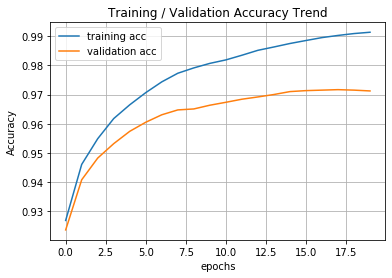

In [7]:
# 과적합 확인

plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

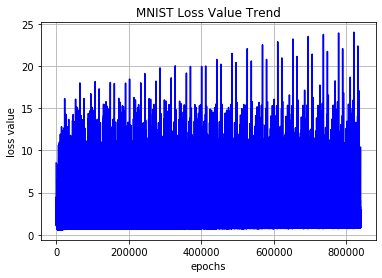

In [8]:
# 손실함수 추세 확인
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.grid()
plt.plot(loss_val_list, color='b')
plt.show()

In [10]:
max_loss = np.max(loss_val_list)
min_loss = np.min(loss_val_list)
max_loss_index = np.argmax(loss_val_list)
min_loss_index = np.argmin(loss_val_list)

print("max_loss = ", max_loss, ", max_loss_index = ", max_loss_index, ", min_loss = ", min_loss, ", min_loss_index = ", min_loss_index)

epochs_num = int(max_loss_index/len(training_data))  # 
print('epochs_num = ', epochs_num)

if max_loss_index > len(training_data):
    real_max_loss_index = max_loss_index-epochs_num*len(training_data)
else:
    real_max_loss_index = max_loss_index
    

if min_loss_index > len(training_data):
    real_min_loss_index = min_loss_index-epochs_num*len(training_data)
else:
    real_min_loss_index = min_loss_index
    


print('real_max_index = ', real_max_loss_index, ', real_min_index = ', real_min_loss_index)  # real_min_loss_index 다시 계산

max_loss =  23.999097520509224 , max_loss_index =  821449 , min_loss =  0.5788205409775559 , min_loss_index =  7390
epochs_num =  19
real_max_index =  23449 , real_min_index =  7390


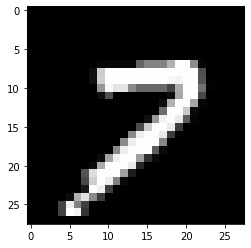

label =  4
prediction =  7


In [11]:
# check max loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[real_max_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

target = int(training_data[real_max_loss_index, 0])

input_data = (training_data[real_max_loss_index, 1:] / 255.0 * 0.99) + 0.01

predicted_num = nn.predict(np.array(input_data, ndmin=2))

print('label = ', target)
print('prediction = ', predicted_num)

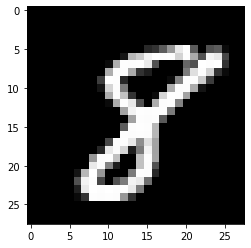

label =  8
prediction =  8


In [12]:
# check min loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[real_min_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

target = int(training_data[real_min_loss_index, 0])

input_data = (training_data[real_min_loss_index, 1:] / 255.0 * 0.99) + 0.01

predicted_num = nn.predict(np.array(input_data, ndmin=2))

print('label = ', target)
print('prediction = ', predicted_num)